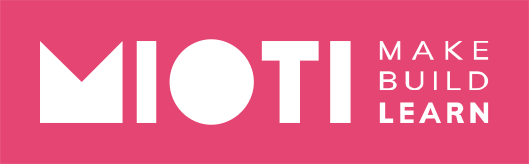
<center style="color:#888">Estadística para Data Science<br/>Asignatura Estadística</center>

# EJERCICIO TRABAJO GRUPO: "BOSTON HOUSING"

Los alumnos, por grupo, deberán entregar, una challenge por cada grupo:
- SESION 8 - EJERCICIOS TRABAJO EN EQUIPO - BOSTONHOUSING - GRUPOXX
- donde XX es el nombre/núero  del equipo/grupo.
- Se usará para su resolución Python.
<hr>

*Nombre Equipo*: **PYTHONEROS**

Miembros del equipo: **Pablo Sagrera** / **Efrain Gonzalez**
>> 

<hr>

# OBJETIVO
<HR>

Se propone un estudio estadísitico del cono cido problema de "Boston Housing".

¿Influye la proporción de personas de color del barrio en el precio?
- ¿Qué variables influyen más?
- ¿Qué ocurre si solo utilizo algunas variables para entrenar el modelo?
- ¿Hay alguna información/conocimiento interesante que se pueda desprender de los datos analizados?

Realizar un análisis de datos detallado sobre el dataset de casas de Boston

Comentar los resultados de los 3 métodos: 
    - Regresión Lineal
    - Regresión Logística
    - Clasificador Bayesiano

Explicar razonadamente el funcionamiento y las transformaciones realizadas a los datos (en el caso
de haberlas realizado)
Incluir al menos:
- Matriz correlaciones y comentarios acerca de la misma
- 2 Gráficas describiendo los datos
- Mejores resultados de los métodos utilizados (que sean reproducibles)

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

**```Información```**

Información del significado del dato:

+ **CRIM**: Per capita crime rate by town
+ **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft
+ **INDUS**: Proportion of non-retail business acres per town
+ **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
+ **NOX**: Nitric oxide concentration (parts per 10 million)
+ **RM**: Average number of rooms per dwelling
+ **AGE**: Proportion of owner-occupied units built prior to 1940
+ **DIS**: Weighted distances to five Boston employment centers
+ **RAD**: Index of accessibility to radial highways
+ **TAX**: Full-value property tax rate per 10,000
+ **PTRATIO**: Pupil-teacher ratio by town
+ **B**: 1000(Bk — 0.63)², where Bk is the proportion of (people of African American descent) by town
+ **LSTAT**: Percentage of lower status of the population
+ **MEDV**: Median value of owner-occupied homes in 1000s

# SOLUCIÓN
<HR>

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pp
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold

Establecemos nuestros parametros para representar nuestras gráficas

In [2]:
plt.rcParams['figure.titlesize']= 40
plt.rcParams['figure.titleweight']= 'bold'
plt.rcParams['axes.labelsize']=10
plt.rcParams['axes.labelpad']= 50.0
plt.rcParams['axes.titlepad']= 50.0
plt.rcParams['xtick.labelsize']= 20.0
plt.rcParams['ytick.labelsize']= 20.0
plt.rcParams['legend.fontsize']= 30.0
plt.rcParams['legend.markerscale']= 4
plt.rcParams['axes.titlesize']= 40.0
plt.rcParams['axes.titleweight']= 'light'
plt.rcParams['figure.figsize']= [30,20]
plt.rcParams['font.size']=22

In [42]:
boston = load_boston()
df = pd.DataFrame(data= np.c_[boston['data'], boston['target']],columns= np.append(boston['feature_names'], 
                                                                                   ['target']))

## 1-Estudio Inicial de los datos

In [5]:
# Vision general del dataframe
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [6]:
# Dimension del dataset
np.shape(df)

(506, 14)

In [16]:
# Sumarizacion de los datos para ver la distribucion de los mismos
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##### Podemos ver que hay dos variables con datos curiosos:
#####      **ZN**: Con valores 0 para los percentiles 25 y 50% (Proporcion de zona residencial para zonas de mas de 25.000 metros cuadrados)
#####      **CHAS**: Con valores 0 para los percentiles 25,50 y 75% (Si es limitrofe con el rio(1) o no(0))
##### Parece que estas variables no ayudaran mucho a precedir el valor de la vivienda (target)

### 1.1 Visualizacion de  outliers

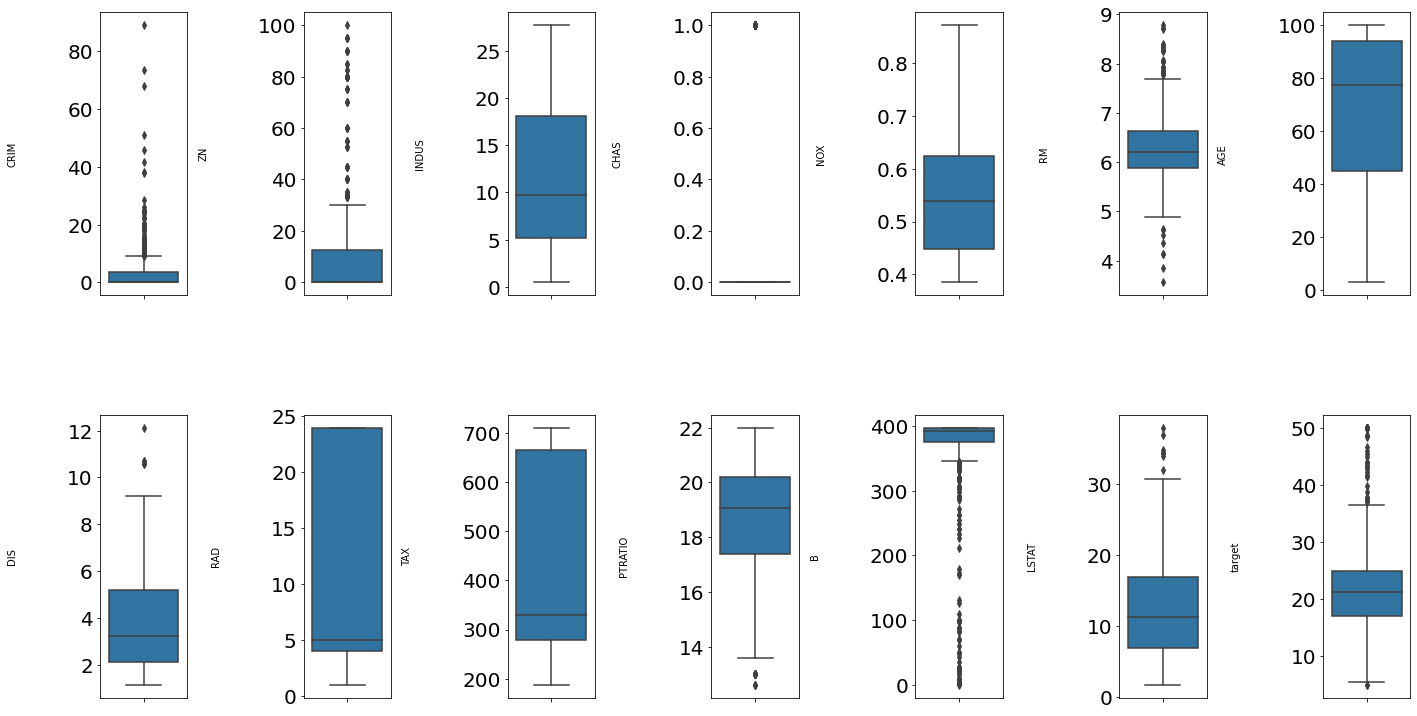

In [8]:
# Vamos a visualizar los outliers
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

##### **CRIM**, **ZN**, **RM**, **B** parecen tener un alto porcentaje de outliers
##### **CRIM** : crimenes per capita
##### **ZN**: Proporcion de zona residencial para zonas de mas de 25.000 metros cuadrados
##### **RM**: Número medio de habitaciones por vivienda
##### **B**: personas de ascendencia afroamericana

In [18]:
# Vemos el numero de outliers de cada columna
for k,v in df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    #rango intercuartilico
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print("Columna %s outliers = %.2f%%" % (k, perc))

Columna CRIM outliers = 13.04%
Columna ZN outliers = 13.44%
Columna INDUS outliers = 0.00%
Columna CHAS outliers = 100.00%
Columna NOX outliers = 0.00%
Columna RM outliers = 5.93%
Columna AGE outliers = 0.00%
Columna DIS outliers = 0.99%
Columna RAD outliers = 0.00%
Columna TAX outliers = 0.00%
Columna PTRATIO outliers = 2.96%
Columna B outliers = 15.22%
Columna LSTAT outliers = 1.38%
Columna target outliers = 7.91%


### 1.2-Analisis de distribucion y correlacion

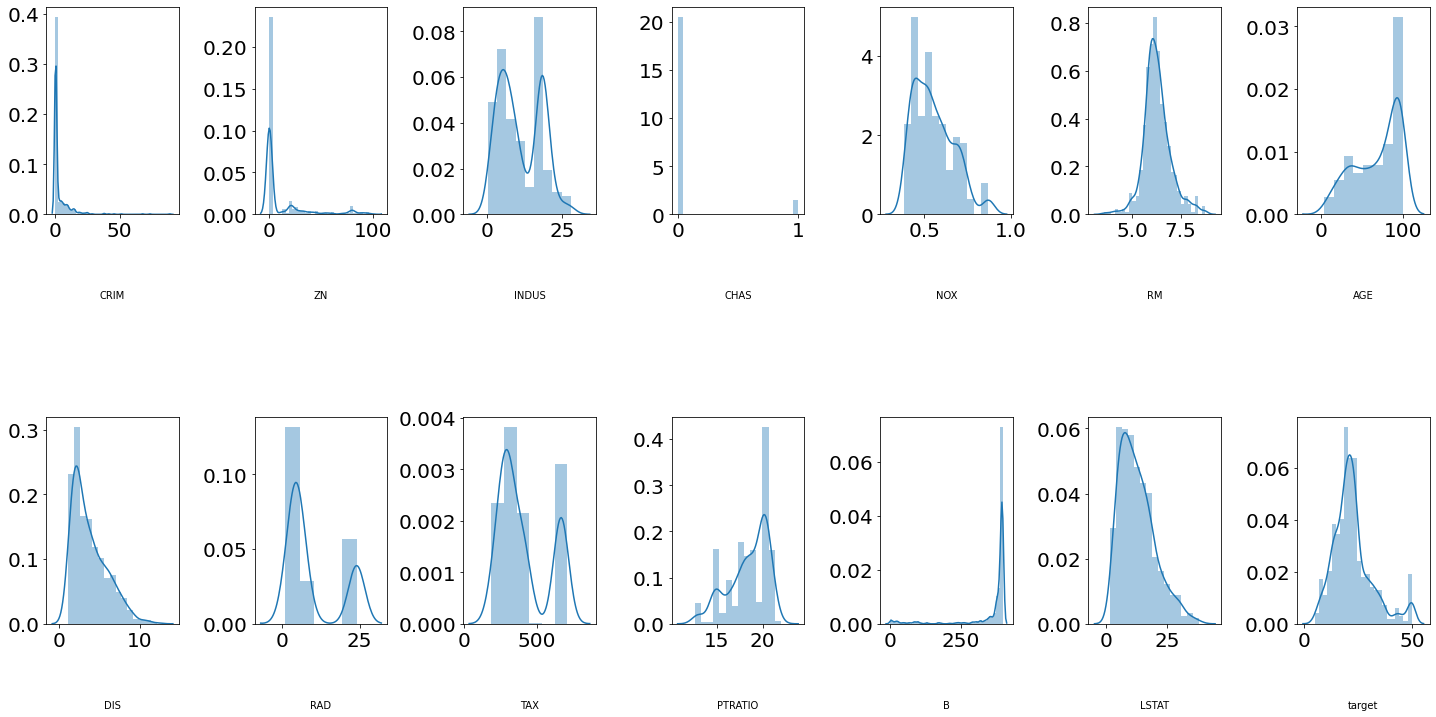

In [17]:
# Veamos cómo se ven estas características más las distribuciones de target

# Debido a un bug en la version 0.9.0 de seaborn, hay que instalar una version superior que contenga el fix ( en nuestro caso 0.10.1).
# https://github.com/mwaskom/seaborn/issues/1990
import warnings
warnings.filterwarnings('ignore')
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

##### El histograma muestra que las columnas **CRIM**, **ZN**, **B** tienen distribuciones muy sesgadas. 
##### La variable **target** (predicciones) parece tener una **distribución normal** 
##### y otras columnas parecen tener una distribuciones entre normal y bimodal excepto **CHAS** (que es una variable variable sentencial ).
##### Por ejemplo, un alto porcentaje de las casas fueron construidas antes de 1940 (aqui se asemeja a una **distribucion de pareto**)
##### **RAD** (indice de acceso a las radiales) y **TAX**(tasa del impuesto sobre la propiedad por 10.000 dolares) son claramente **bimodales**

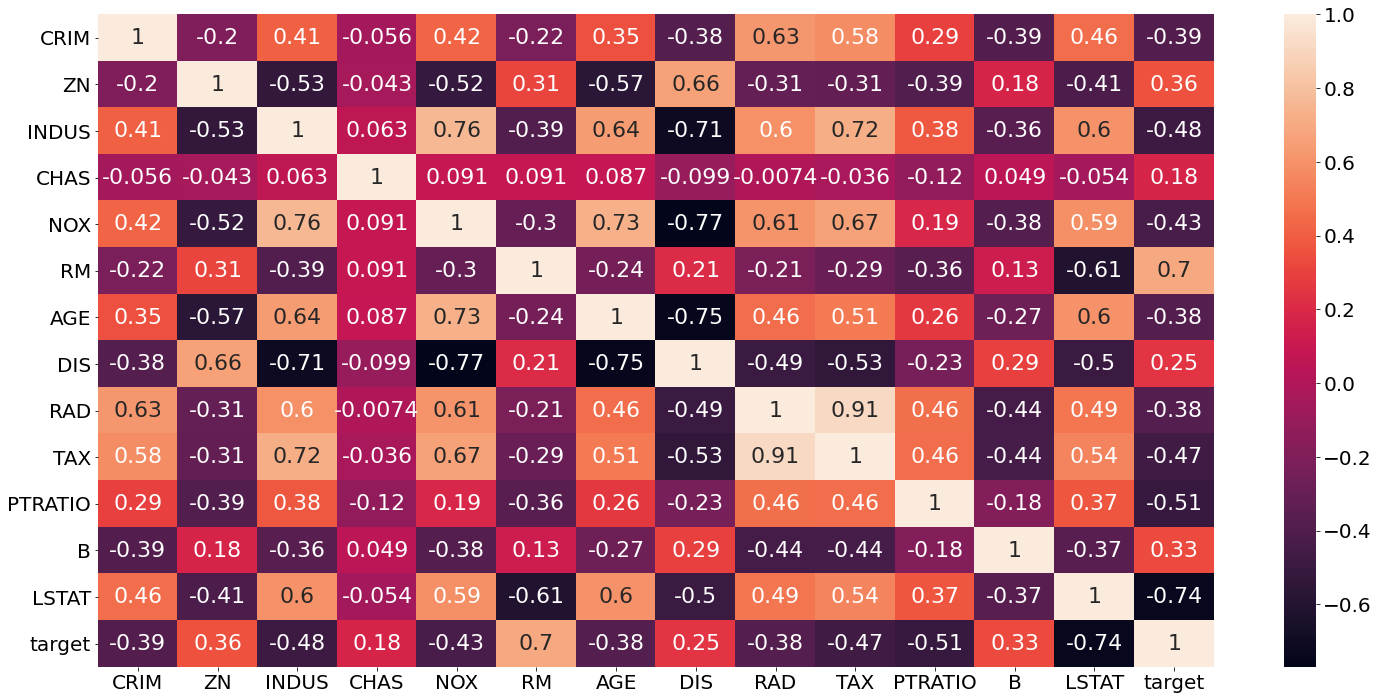

In [27]:
# MATRIZ de CORRELACION
plt.figure(figsize=(25, 12))
sns.heatmap(df.corr(),  annot=True)

##### Las variables **RAD** y **TAX** tienen un alto nivel de correlacion entre ellas (0.91)
##### **NOX** y **AGE** tambien tienen un razonble nivel de correlacion entre ellas (0.73) 
##### **INDS** y **TAX** igualmente guardan un razonable nivel de correlacion entre ellas (0.72)

##### Para ver posibles predictores buscaremos aquellas variables que en su correlacion con target esten por encima de 0.5 en valor abosulto:
##### **RM**,**TAX**,**LSTAT**,**PTRATIO** (y de estas cuatro, **RM** y **LSTAT**The  son las mas correladas)
##### **RM** tiene correlacion positiva, es decir, **RM**The  y target son variables directamente proporcionales. Casas con mas habitaciones cuestan mas
##### Tanto **LSTAT** como **PTRATIO** tienen correlacion negativa, es decir , ambas son variables inversamente proporcionales.
##### Vecindades con mayor numero de trabajadores de bajos ingresos seran mas baratas (**LSTAT**) y vecindades donde el ratio profesor alumno sea mas alto(**PTRATIO**), puede significar que el numero de colegios es menor y por lo tanto el coste de la vivienda sea mas barato.


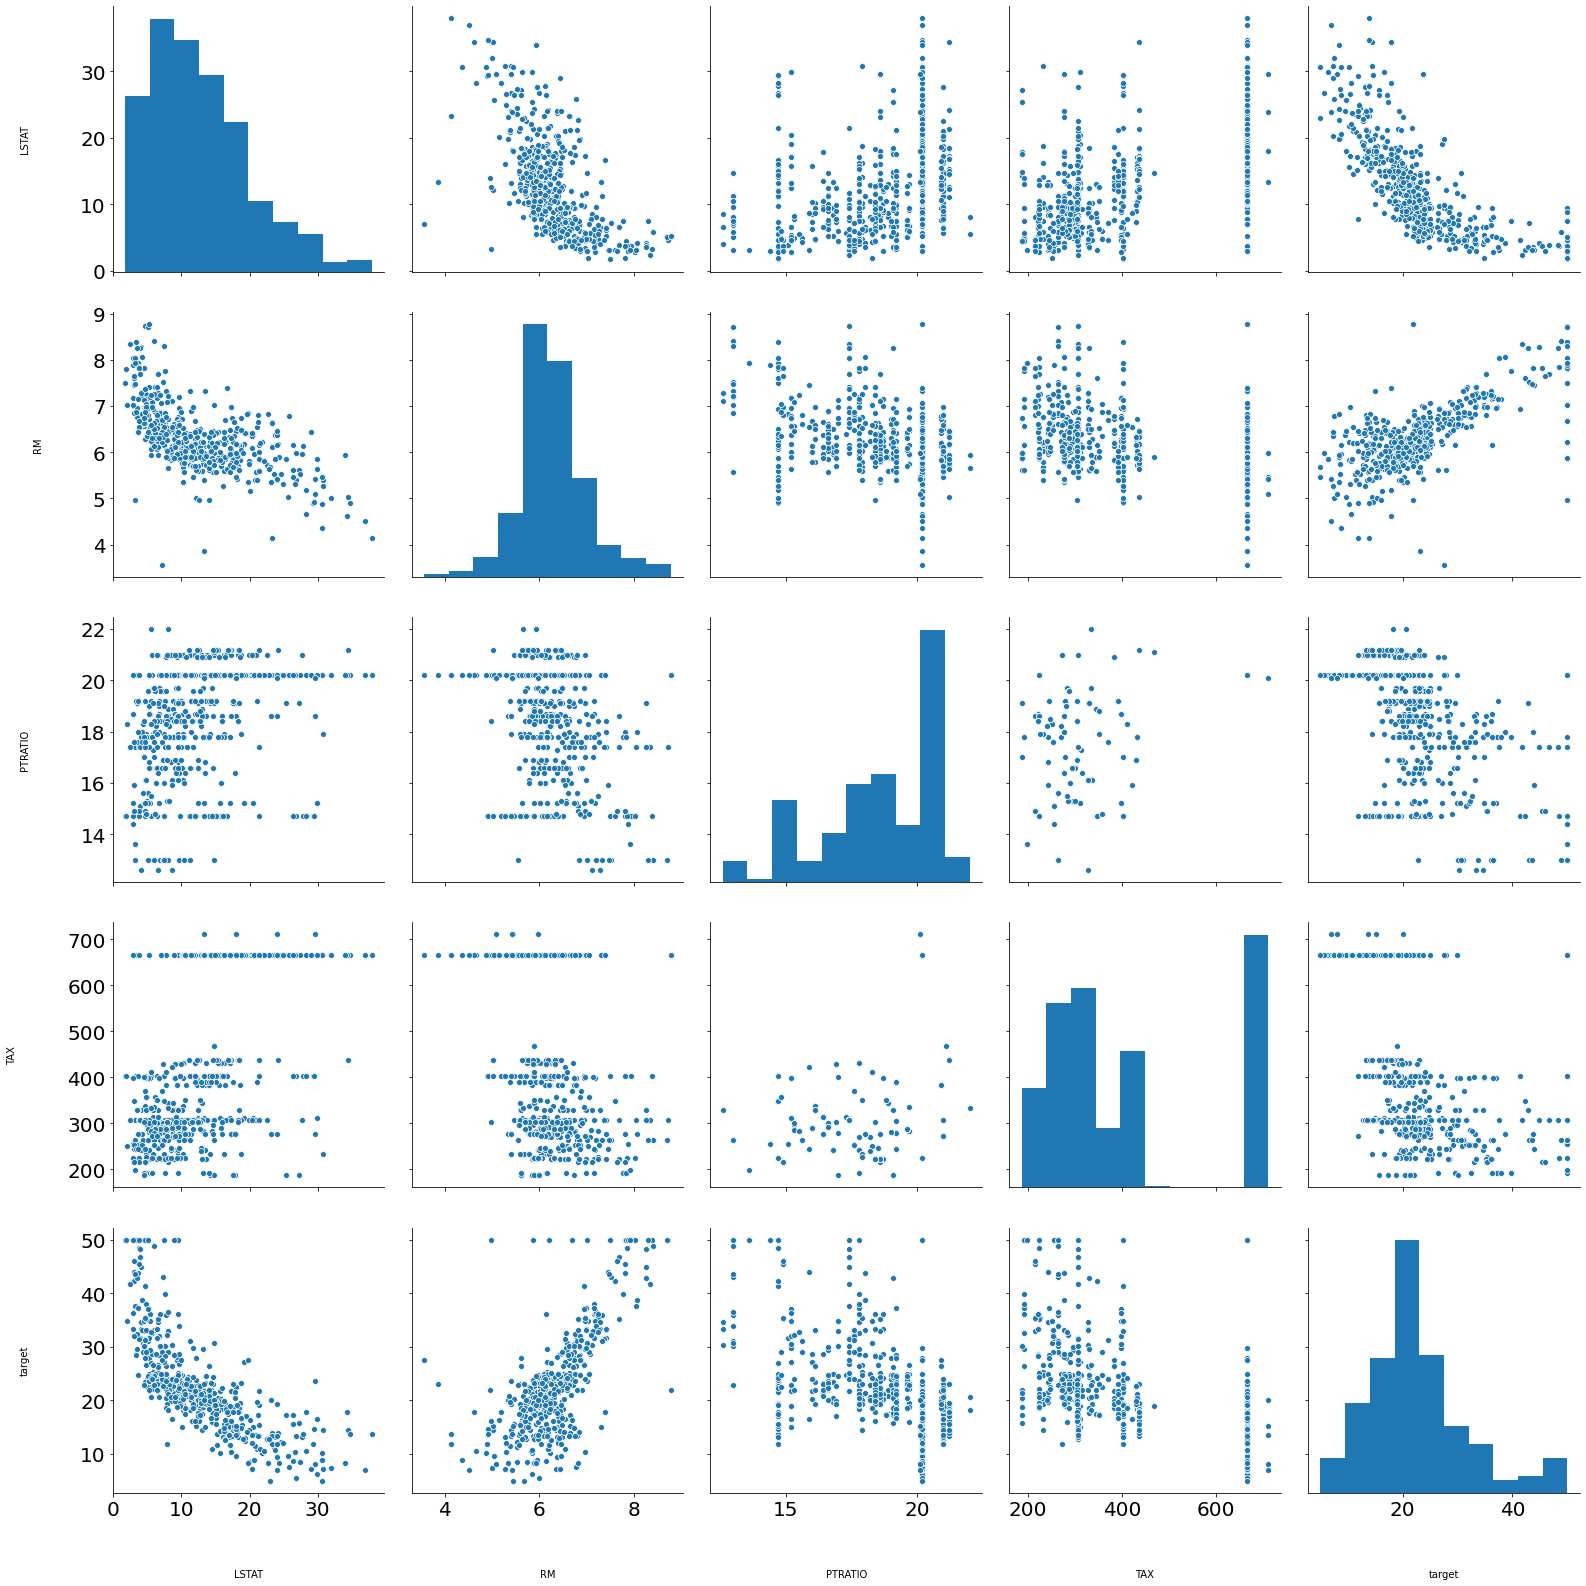

In [62]:
# PAIR PLOT de visualizacion de datos
df_filtered = df.copy()
df_filtered = pd.DataFrame(np.c_[df['LSTAT'], df['RM'],df['PTRATIO'],df['TAX'],df['target']], columns = ['LSTAT','RM','PTRATIO','TAX','target'])
sns.pairplot(df_filtered, size=4.5)
plt.tight_layout()

##### En el caso de **LSTAT** se ve que a menor concentracion de poblacion de bajo poder adquisitivo, el precio es mas alto, de ahi la correlacion negativa.
##### En el caso de **RM**, parece que a partir de 7-8 hay mas linealidd en la distribucion, es decir, que a partir de cierto numero de habitaciones el precio se ve influido notoriamente, debido probablemente a que esas viviendas con tantas habitaciones solo se den en lugares caros 
##### En el caso de **TAX** y **PTRATIO** no se ve a priori algun tipo de relacion evidente.

### 1.3- Regresion Lineal

In [52]:
# Preparamos los datos para entrenar un modelo de regresion lineal
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = boston['target']

# Usamos 80% para training y 20% para testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

# Creamos el objeto regresor
regressor = LinearRegression()
# Entrenamos al regresor
regressor.fit(X_train,Y_train)
print('R2 ENTRENAMIENTO',regressor.score(X_train,Y_train))
y_pred_li= regressor.predict(X_test)
print('R2 TEST',regressor.score(X_test,Y_test))

R2 ENTRENAMIENTO 0.6618625964841893
R2 TEST 0.5409084827186417


##### Se ve claramente que los resultados a tenor de los valores de entrenamiento y test no son buenos

### 2.- CLASIFICADOR

In [97]:
# Este tipo de problemas en donde tenemos que predecir una valor objetivo numerico,
# se engloba dentro de los sistemas de Machine learning como aprendizaje supervisado.
# Tipicos ejemplos de aprendizaje supervisado son:
    # - Clasificacion
    # - Prediccion de un valor numerico objetivo (Regresion).
# Vamos a transformar el problema a uno de clasificacion para ver si mejora el rendimiento con respecto a la regresion.
# En nuestro casos lo que buscamos se encuentra dentro de un rango, con lo que un buen clasificador (buenos resultados) puede ajustarse bastante bien a nuestro problema
# Transformamos nuestra variable de salida en clases.
# El primer paso es decidir el numero de clases. A tener en cuenta es que cuantas mas clases hagamos mayor sera la precision de la clase (que es donde de encuentra
# el rango de valores, pero peor sera la precision del algoritmo. Si por el contrario hacemos pocas clases, tendremos mayor precision del algoritmo pero menos 
# precision de clases). Esto se puede plantear como un problema de optimizacion cuya variable es el numero de clases

# Hacemos 5 clases de inicio : (0-10]->Muy Barato (10-20]->Barato (20-30]->Medio (30-40]->Caro (40-50]->Muy caro
                     
class1 = load_boston()['target']
for i in range(class1.shape[0]):
    if(class1[i]<=10): class1[i]=0
    if(class1[i]<=20 and class1[i]>10): class1[i]=1
    if(class1[i]<=30 and class1[i]>20): class1[i]=2
    if(class1[i]<=40 and class1[i]>30): class1[i]=3
    if(class1[i]>40): class1[i]=4

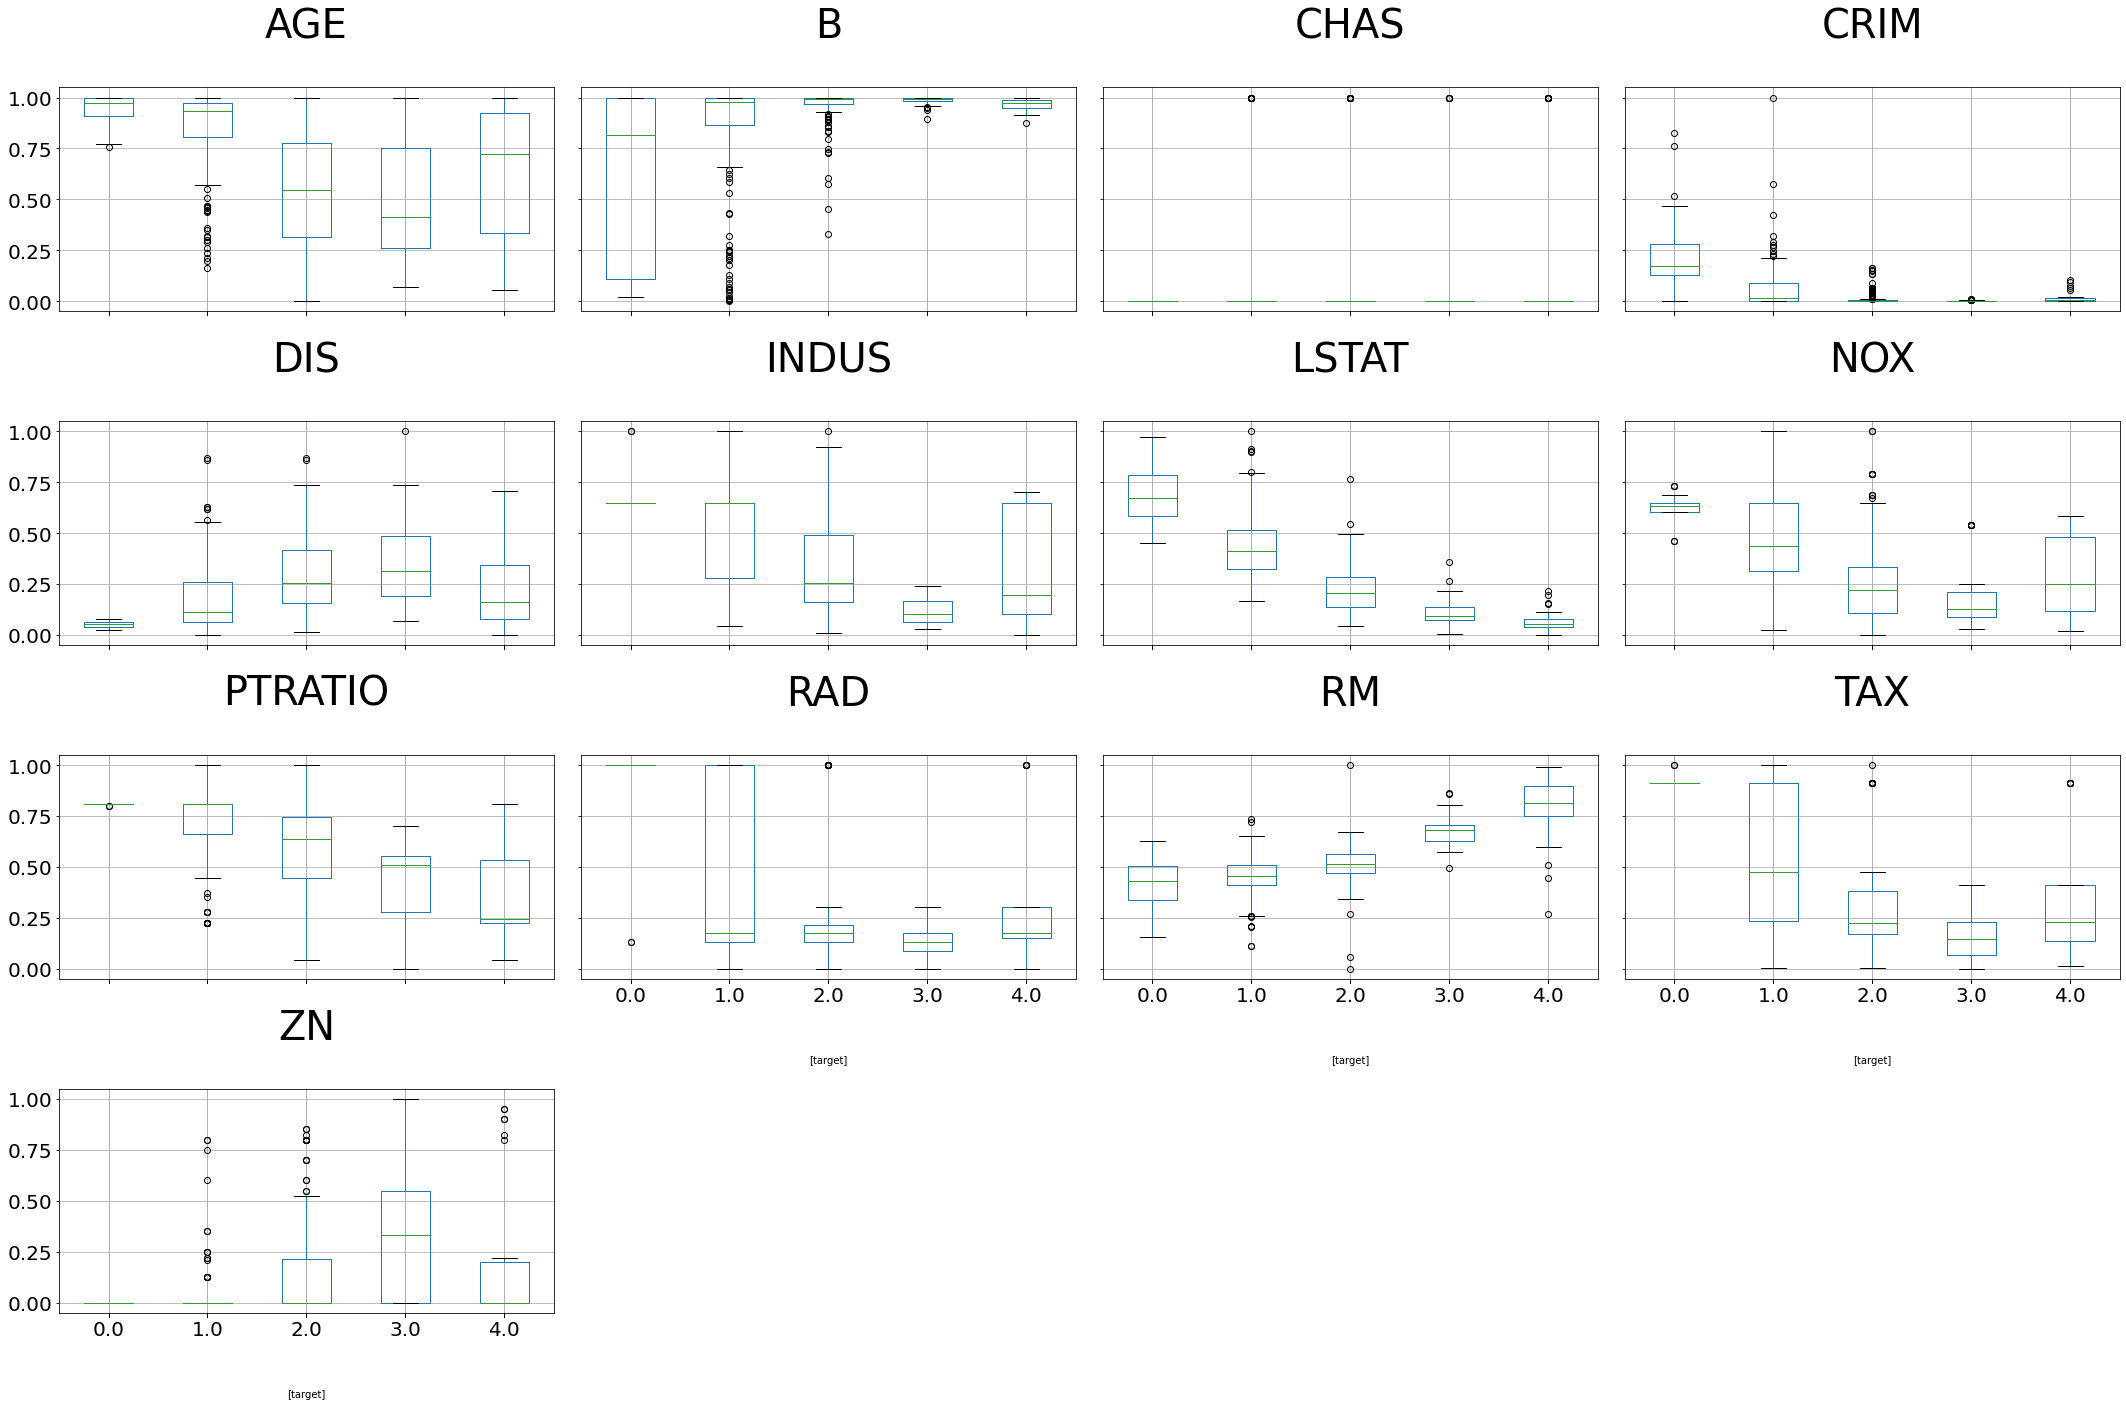

In [98]:
# Como parte del preprocesado de datos se suele usar lo que se denomina Feature Scaling o Standardization. Esto se aplica a variables independientes de los datos
# y basicamente ayuda a normalizar los datos dentro de un rango en particular. En ocasiones ayuda a acelerar los calculos de los algoritmos.
# En este caso nos permitira ver las discriminaciones de clases de los distintos atributos.
# Dentro de la libreria de scikit-learn tenemos varios metodos para hacer Feature Scaling o Standardization:
    #- StandardScaler : Este metodo asume que los datos siguen una distribucion normal dentro de cada feature y los escalará de tal manera que la distribución estara ahora centrada alrededor de 0, con una desviación estándar de 1
    #- MinMaxScaler : Esencialmente encoge el rango de tal manera que ahora está entre 0 y 1 (o -1 a 1 si hay valores negativos).Si la distribución no es gaussiana o la desviación estándar es muy pequeña, el min-max funciona mejor.
    #                Sin embargo es sensible a los outliers.
    #- RobustScaler : Es similar al MinMaxScaler pero tiene en cuenta el rango intercuartilico en lugar de los valores max y min, para ser mas robusto ante outliers

# Vamos a usar de inicio MinMaxScaler

min_max_scaler = pp.MinMaxScaler()
data_normalized = min_max_scaler.fit_transform(df)
df_n = pd.DataFrame(data_normalized,columns=df.columns)
# Eliminamos la variable target y le pasamos las clases
df_n1 = df_n.drop(["target"],axis=1)
df_n1["target"] = class1
df_n1.boxplot(by="target")
plt.suptitle('')
plt.tight_layout()
plt.show()



Las **variables que explican mejor**, separan las clases, son las que **ya detectamos previamente con en análisis en la regresión lineal (LSTAT Y RM)**. En una **nube de puntos con cierta correlacion**, ya sea positiva o negativa, **si se divide en clases** y estas luego se representan en un **diagrama de cajas, estas estarán más o menos separadas en función si el gráfico de dispersión está mas o menos correlado**.

Se ve que RM no es capaz de separar muy bien las clases bajas, esto puede ser debido a la dilatacion de puntos que hay en las zonas bajas del diagrama de dispersion.

Como hay algunos atributos que son capaces de diferenciar las clases(**PTRATIO**,**RAD**,**TAX**,**INDUS**,**AGE** y **NOX**), podemos probar a reducir el numero de clases para comprobar si alguno de estos las diferencia mejor.

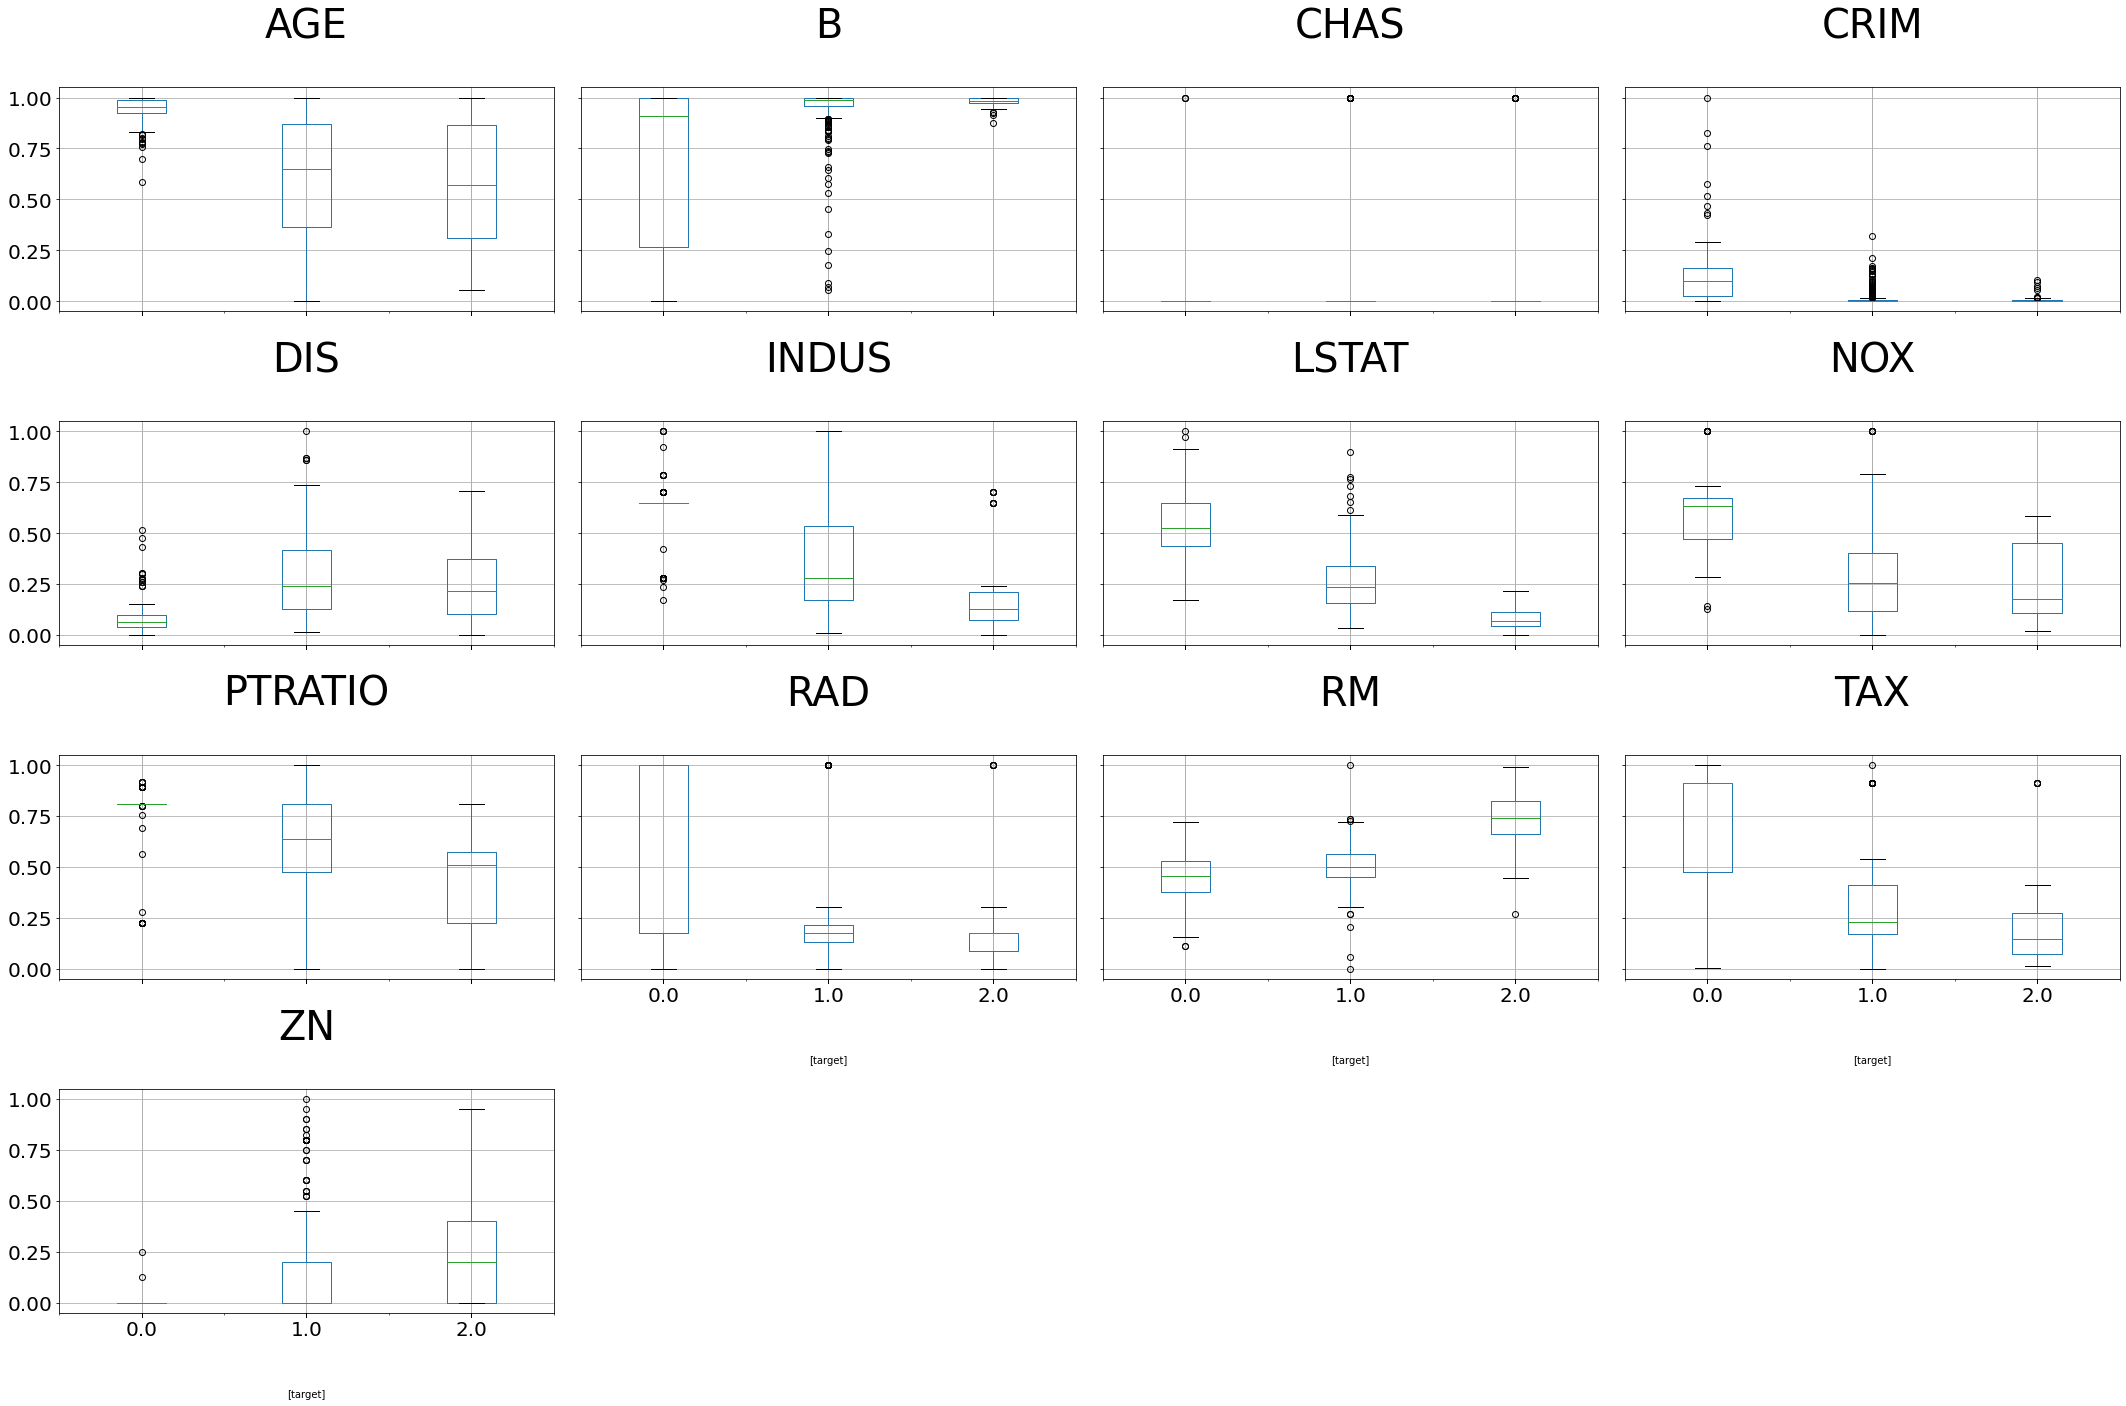

In [96]:
class2 = load_boston()['target']
for i in range(class2.shape[0]):
    if(class2[i]<=16): class2[i]=0
    if(class2[i]<=33 and class2[i]>16): class2[i]=1
    if(class2[i]>33): class2[i]=2
df_n2 = df_n.drop(["target"],axis=1)
df_n2["target"] = class2
df_n2.boxplot(by="target")
plt.suptitle('')
plt.tight_layout()
plt.show()

##### Como vemos han aparecido nuevos atributos con buenos resultados con respecto a la clasificacion en base a 5 clases (**TAX**,**PTRATIO**,**INDUS** ), en el caso de **PTRATIO** e **INDUS** tenemos muchos outliers en la clase 0 , asi que a priori lo descarttamos.

## 2.1 MODELOS (5 clases)

In [99]:
# La función sklearn.model_selection.KFold divide un conjunto de datos en k bloques. 
# A continuación, considera uno de ellos como conjunto de validación y el resto como conjunto de entrenamiento,
# devolviendo las k combinaciones posibles (la primera combinación es la que considera el primer bloque como conjunto de validación 
# y el resto como conjunto de entrenamiento, la segunda es la que considera el segundo bloque como conjunto de validación 
# y el resto como conjunto de entrenamiento, etc.)

X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = boston['target']
kf = KFold(n_splits = 4,shuffle=True,random_state=0)

#### 2.1.1-Regresion Lineal

In [120]:
# Variables para scoring
train_percentage = 0
test_percentage = 0
test_percentage2 = 0

for train_index, test_index in kf.split(X):
    X_train,X_test = X.iloc[train_index],X.iloc[test_index]
    Y_train, Y_test = class1[train_index],class1[test_index]
    #TRAINING
    regressor.fit(X_train,Y_train)
    train_percentage += regressor.score(X_train,Y_train)
    test_percentage += regressor.score(X_test,Y_test)
    #PREDICTION
    y_pred_li= regressor.predict(X_test)
    y_pred_li = np.absolute(np.round(y_pred_li,0))
    test_percentage2 += sk.metrics.accuracy_score(Y_test,y_pred_li)

# Para obtener el porcentaje, tenemos que dividir el score por el numero de bloques.    
print("PORCENTAJE DE ACIERTO ENTR R2", train_percentage/4)
print("PORCENTAJE DE ACIERTO TEST R2", test_percentage/4)
print("PORCENTAJE DE ACIERTO TEST",test_percentage2/4)

PORCENTAJE DE ACIERTO ENTR R2 0.622535280518145
PORCENTAJE DE ACIERTO TEST R2 0.6088038089844356
PORCENTAJE DE ACIERTO TEST 0.6482470941132359


##### No hemos mejorado gran cosa respecto a la regresion lineal sin clases.

#### 2.1.2-Regresion Logistica

In [121]:
# Con la regresion logistica tratamos de predecir valores discretos.
# Resolver la regresión logística es un problema de optimización. 
# Tenemos varios algoritmos de resolución que podemos usar (solver)
# - newton-cg
# - lbfgs
# - liblinear ---> default
#      Utiliza un algoritmo de descenso de coordenadas.
#        El descenso de coordenadas se basa en la minimización de una función multivariante mediante la resolución de problemas de optimización univariante en un bucle.
#        En otras palabras, se mueve hacia el mínimo en una dirección a la vez. 
#        Funciona bastante bien con alta dimensionalidad. Tiene una serie de inconvenientes: 
#          Puede atascarse, es incapaz de funcionar en paralelo, y sólo puede resolver la regresión logística multiclase con uno contra el resto
# - sag
# - saga
# El regresor logístico es un algoritmo que si que se ve afectado por la multicolinealidad por lo que debermeos seleccionar atributos que no esten correlados
# Es sensible a los outliers, tenemos que ver en que grado afectan, mirando el diagrama de cajas. Tenemos que trazar lineas horizantales entre las clases
# desde el valor minimo al maximo teniendo en cuenta los outliers y ver si los outliers de otras clases caen dentro del areal de esas dos lineas, lo que significara
# que se van a clasificar incorrectamente.

# numpy.ravel --> Return a contiguous flattened array.
# Example
#>>> x = np.array([[1, 2, 3], [4, 5, 6]])
#>>> np.ravel(x)
#array([1, 2, 3, 4, 5, 6])

## TODO:: Calculo de la multicolinealidad - Test de inflacion de la Varianza (VIF)
#X = np.c_[dataframe['Viento_MAX'],dataframe['Viento_MED'],dataframe['T_MAX'],dataframe['T_MIN'],dataframe['Lluvia']]
#vif = pd.DataFrame()
#vif["Features"] = ['Viento_MAX','Viento_MED','T_MAX','T_MIN','Lluvia']
#vif["VIF Factor"] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
#print(vif)

#>+ = 1: No hay multicolinealidad 
#+ [1,6): Multicolinealidad moderada
#+ [6,∞] : multicolinealidad alta



modelo = LogisticRegression(solver = "liblinear",multi_class="auto")

rscoreT = 0
rscoreE = 0
#conf_matrix = np.zeros((2,2))
for train_index, test_index in kf.split(X):
    X_train,X_test = X.iloc[train_index],X.iloc[test_index]
    y_train, y_test = class1[train_index],class1[test_index]
    #TRAINING
    modelo.fit(X_train,np.ravel(y_train))
    # PREDICCION
    y_pred = modelo.predict(X_test)
    rscoreT += modelo.score(X_test, np.ravel(y_test))
    rscoreE += modelo.score(X_train, np.ravel(y_train))
print("PORCENTAJE DE ACIERTO ENTR: ",rscoreE/4)
print("PORCENTAJE DE ACIERTO TEST: ",rscoreT/4)


PORCENTAJE DE ACIERTO ENTR:  0.6640310373559228
PORCENTAJE DE ACIERTO TEST:  0.6560742407199099


##### Sensible mejora con respecto al modelo de regresion lineal con clases

#### 2.1.3-Clasificador Bayesiano

In [126]:
#En términos simples, un clasificador de Bayes ingenuo asume que la presencia o ausencia de una característica particular no está relacionada 
# con la presencia o ausencia de cualquier otra característica, dada la clase variable. 
# Por ejemplo, una fruta puede ser considerada como una manzana si es roja, redonda y de alrededor de 7 cm de diámetro.
# Un clasificador de Bayes ingenuo considera que cada una de estas características contribuye de manera independiente a la probabilidad de que esta fruta sea una manzana,
# independientemente de la presencia o ausencia de las otras características.

# Este modelo por definicion no sera sensible a los outliers , pero si lo sera y mucho para los atributos correlados, ya que toma como base que los 
# atributos son idependientes entre ellos. Tenemos que estar seguro que los atributos que pasemos al algoritmo no estan correlados entre ellos.

# numpy.ravel --> Return a contiguous flattened array.
# Example
#>>> x = np.array([[1, 2, 3], [4, 5, 6]])
#>>> np.ravel(x)
#array([1, 2, 3, 4, 5, 6])

rscoreT = 0
rscoreE = 0
model = GaussianNB()

for train_index,test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = class1[train_index], class1[test_index]
    # TRAINING
    model.fit(X_train, np.ravel(y_train)) #training the algorithm
    # PREDICTION
    y_pred = model.predict(X_test)
    rscoreT += model.score(X_test, np.ravel(y_test))
    rscoreE += model.score(X_train, np.ravel(y_train))

print("PORCENTAJE DE ACIERTO ENTR: ",rscoreE/4)
print("PORCENTAJE DE ACIERTO TEST: ",rscoreT/4)




PORCENTAJE DE ACIERTO ENTR:  0.7246441466462992
PORCENTAJE DE ACIERTO TEST:  0.727284089488814


##### Cierta mejora respecto al clasificador logistico

## 2.1 MODELOS (3 clases)

In [ ]:
# Vamos a repetir el mismo proceso pero en este caso usando 3 clases, que como deciamos antes, mejorara la precision del algoritmo a costa de empeorar
# la precision de las clases

#### 2.1.1 Regresion Lineal

In [128]:
# Variables para scoring
train_percentage = 0
test_percentage = 0
test_percentage2 = 0

for train_index, test_index in kf.split(X):
    X_train,X_test = X.iloc[train_index],X.iloc[test_index]
    Y_train, Y_test = class2[train_index],class2[test_index]
    # TRAINING
    regressor.fit(X_train,Y_train)
    train_percentage += regressor.score(X_train,Y_train)
    test_percentage += regressor.score(X_test,Y_test)
    # PREDICTION
    y_pred_li= regressor.predict(X_test)
    y_pred_li = np.absolute(np.round(y_pred_li,0))
    test_percentage2 += sk.metrics.accuracy_score(Y_test,y_pred_li)

# Para obtener el porcentaje, tenemos que dividir el score por el numero de bloques.    
print("PORCENTAJE DE ACIERTO ENTR R2", train_percentage/4)
print("PORCENTAJE DE ACIERTO TEST R2", test_percentage/4)
print("PORCENTAJE DE ACIERTO TEST",test_percentage2/4)

PORCENTAJE DE ACIERTO ENTR R2 0.544865945627152
PORCENTAJE DE ACIERTO TEST R2 0.5336748251285468
PORCENTAJE DE ACIERTO TEST 0.7944631921009873


#### 2.1.2 Regresion Logistica

In [130]:
modelo2 = LogisticRegression(solver = "liblinear",multi_class="auto")

rscoreT = 0
rscoreE = 0
#conf_matrix = np.zeros((2,2))
for train_index, test_index in kf.split(X):
    X_train,X_test = X.iloc[train_index],X.iloc[test_index]
    y_train, y_test = class2[train_index],class2[test_index]
    #TRAINING
    modelo2.fit(X_train,np.ravel(y_train))
    # PREDICTION
    y_pred = modelo2.predict(X_test)
    rscoreT += modelo2.score(X_test, np.ravel(y_test))
    rscoreE += modelo2.score(X_train, np.ravel(y_train))
print("PORCENTAJE DE ACIERTO ENTR: ",rscoreE/4)
print("PORCENTAJE DE ACIERTO TEST: ",rscoreT/4)

PORCENTAJE DE ACIERTO ENTR:  0.808967504513262
PORCENTAJE DE ACIERTO TEST:  0.8003999500062491


##### 2.1.3 Clasificador Bayesiano

In [131]:
rscoreT = 0
rscoreE = 0
model2 = GaussianNB()

for train_index,test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = class2[train_index], class2[test_index]
    # TRAINING
    model2.fit(X_train, np.ravel(y_train)) #training the algorithm
    # PREDICTION
    y_pred = model2.predict(X_test)
    rscoreT += model2.score(X_test, np.ravel(y_test))
    rscoreE += model2.score(X_train, np.ravel(y_train))

print("PORCENTAJE DE ACIERTO ENTR: ",rscoreE/4)
print("PORCENTAJE DE ACIERTO TEST: ",rscoreT/4)

PORCENTAJE DE ACIERTO ENTR:  0.8333304402166365
PORCENTAJE DE ACIERTO TEST:  0.828037120359955


## CONCLUSIONES

#### Como deciamos antes la eleccion del numero de clases se puede plantear como un problema de optimizacion

##### Un problema de optimización puede ser representado de la siguiente forma:
##### Dada: una función f : A → R
##### Buscar: un elemento x0 en A tal que f(x0) ≤ f(x) para todo x en A («minimización») o tal que f(x0) ≥ f(x) para todo x en A («maximización»).
##### En nuestro caso:
##### f(x1,x2) = @x1+(1-@)x2
##### x1 = % acierto del algoritmo
##### x2 = % de precision de las clases (1 -rango/rango total)
##### @ = constante entre [0,1] que segun el valor que le demos dara mayor importancia a una variable o a otra (si ponemos @=0.5), daremos la misma importancia a la precision de las clases y a la del algoritmo.

##### Tras los resultados visto, comprobamos que reduciendo el numero de clases tenemos mejor precision del algoritmo aunque perdamos precision de clases.
##### Vamos a ver aplicando la funcion de optimizacion cual es la mejor solucion:

+ **5 clases**

	- f(0.7944,0.8) **Regresion Lineal:**     0,5x0,7944 + 0,5x0,8 = 0,7972

	- f(0.8003,0.8) **Regresion Logistica:**  0,5x0,8003 + 0,5x0,8 = 0,8001 

	- f(0.8280,0.8) **Clasificador Bayesiano:** 0,5x0,8280 + 0,5x0,8 = 0,814


+ **3 clases**

	- f(0.6482,0.66)  **Regresion Lineal** 0,5x0,6482 + 0,5x0,66 = 0,6541

	- f(0.6560,0.66)  **Regresion Logistica** 0,5x0,6560 + 0,5x0,66 = 0,658

	- f(0.72720.66)   **Clasificador Bayesiano** 0,5x0,72720 + 0,5x0,66 = 0,6936

##### El clasificador **Bayesiano** de 5 clases es el que mejor resultado obtiene.


